# UNAM - FES Acatlán
# Ciencia de Datos
# Visualización de la Información
## Nombre: Leija Estrada Shanelly Abisay & González Paz Edgar
### Laboratorio de Visualización
### Práctica No. 10
### “Visualización con Mapas de Calor”
### Reporte de Laboratorio

Código Visualization with seaborn- heatmap (vídeo)

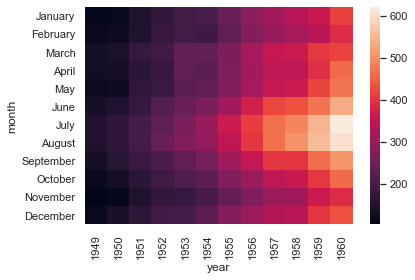

In [25]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

example_four = sns.load_dataset('flights')
example_four = example_four.pivot('month', 'year', 'passengers')
display_four = sns.heatmap(example_four)

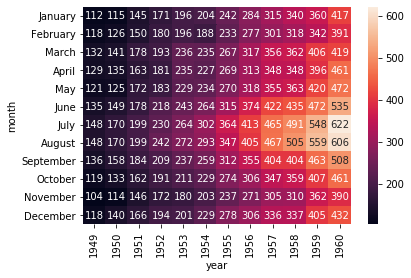

In [2]:
display_four = sns.heatmap(example_four, annot = True, fmt = 'd')

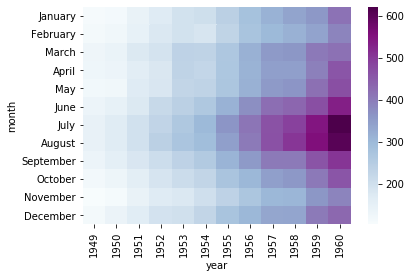

In [3]:
display_four = sns.heatmap(example_four, cmap = 'BuPu')

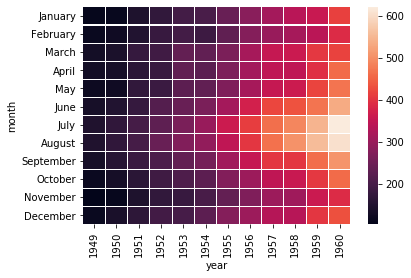

In [4]:
display_four = sns.heatmap(example_four, linewidth =0.1)

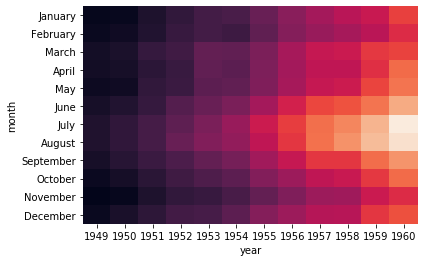

In [5]:
display_four = sns.heatmap(example_four, cbar=False)

# Recursos y código utilizados

In [6]:
import pandas as pd
#Esta librería hay que descargarla para que funcione, con ella se calcula las medias móviles y el indices de fuerza relativa
#para el trabajo
import talib

In [12]:
MCD = pd.read_excel('Acciones-MCD.xlsx')
MCD.columns = ['Fecha', 'Adj_Close', 'Volumen']
MCD.head()

,Fecha,Adj_Close,Volumen
0,2018-05-16,155.114426,2522000
1,2018-05-17,153.628708,2975500
2,2018-05-18,153.314423,2318000
3,2018-05-21,153.790619,2424000
4,2018-05-22,151.857285,3224000


La idea es construir una matriz de correlación con las variables más explicativas para la variable objetivo, en este caso, emplearemos el Coeficiente de Correlación de Pearson el cual mide las relaciones lineales entre dos variables, después apreciaremos la relación entre cada variable con un mapa de calor.

Hay que crear más variables a partir de nuestros datos históricos (valor de cierre ajustado y volumen) de la acción.

In [13]:
#Variable que indica el pronóstico a 5 días
MCD['Adj_Close_5d'] = MCD['Adj_Close'].shift(-5)
#Variable que indica el pronóstico del cambio porcentual en los últimos 5 días 
MCD['Adj_Close_5d_pron'] = MCD['Adj_Close_5d'].pct_change(5)
#Variable que indica el cambio porcentual en los ultimos 5 días
MCD['Adj_Close_5d_porc'] = MCD['Adj_Close'].pct_change(5)


# Creamos dos nuevas variables para comparar en el mapa de calor: medias móviles e indice de fuerza relativa para los días 
#14, 30, 50, y 200

var_explicativas = ['Adj_Close_5d_porc']  

for i in [14,30,50,200]:
    #Variable de media móvil normalizadas
    MCD['MM'+str(i)] = talib.SMA(MCD['Adj_Close'].values, timeperiod=i) / MCD['Adj_Close']
    #Variable de indice de fuerza relativa
    MCD['IFR' + str(i)] = talib.RSI(MCD['Adj_Close'].values, timeperiod=i)
    var_explicativas = var_explicativas + ['MM' + str(i), 'IFR' + str(i)]

MCD = MCD.dropna()

var_obj_exp = ['Adj_Close_5d_pron'] + var_explicativas
MCDvar_obj_exp = MCD[var_obj_exp]

#Matriz de correlación
corr = MCDvar_obj_exp.corr()
corr

,Adj_Close_5d_pron,Adj_Close_5d_porc,MM14,IFR14,MM30,IFR30,MM50,IFR50,MM200,IFR200
Adj_Close_5d_pron,1.000000,-0.047985,0.068866,0.052197,0.162113,0.001680,0.214339,-0.030961,0.187905,-0.099716
Adj_Close_5d_porc,-0.047985,1.000000,-0.822674,0.486417,-0.596413,0.388177,-0.461388,0.335497,-0.300325,0.239028
MM14,0.068866,-0.822674,1.000000,-0.619979,0.871596,-0.544700,0.731207,-0.498442,0.514917,-0.412743
IFR14,0.052197,0.486417,-0.619979,1.000000,-0.706138,0.927933,-0.754907,0.830194,-0.599032,0.608132
MM30,0.162113,-0.596413,0.871596,-0.706138,1.000000,-0.685736,0.936585,-0.654153,0.704869,-0.585179
IFR30,0.001680,0.388177,-0.544700,0.927933,-0.685736,1.000000,-0.806757,0.973673,-0.776002,0.811380
MM50,0.214339,-0.461388,0.731207,-0.754907,0.936585,-0.806757,1.000000,-0.802404,0.862863,-0.773044
IFR50,-0.030961,0.335497,-0.498442,0.830194,-0.654153,0.973673,-0.802404,1.000000,-0.865303,0.909791
MM200,0.187905,-0.300325,0.514917,-0.599032,0.704869,-0.776002,0.862863,-0.865303,1.000000,-0.966887
IFR200,-0.099716,0.239028,-0.412743,0.608132,-0.585179,0.811380,-0.773044,0.909791,-0.966887,1.000000


### Resultados

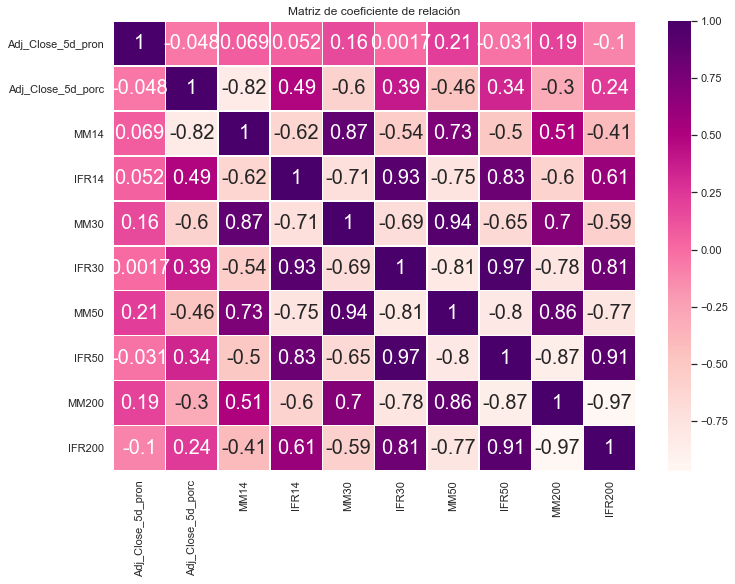

In [30]:
ax = plt.axes()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr, annot= True, annot_kws = {"size": 20}, cmap = "RdPu" , linewidths=.5)
ax.set_title('Matriz de coeficiente de relación')
plt.show()

# Conclusiones

En este caso, la visualización de la información nos ayudó en el análisis exploratorio de los datos, con un mapa de calor podemos identificar aquellas variables que tengan mayor relación con nuestra variable objetivo Adj_Close_5d_pron, así podemos identificarla visulamente con colores pues se eligierían aquellas más cercanas a 1 o -1.

# Referencias

In [ ]:
#Paquetería TA-lib
https://github.com/mrjbq7/ta-lib